# Pyber Challenge

### Load and Read the CSV files

In [45]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import dates

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the city and ride data files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)



### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Get a Summary Dataframe

In [3]:
# Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

# Get the total drivers for each city type
type_driver_sum = city_data_df.groupby(["type"]).sum()['driver_count']

# Get the total amount of fares for each city type
type_fare_sum = pyber_data_df.groupby(["type"]).sum()["fare"]

# Get the average fare per ride for each city type
type_avg_fare = type_fare_sum/type_ride_count

# Get the average fare per driver for each city type
type_avg_driver_fare = type_fare_sum/type_driver_sum

# Create a PyBer summary DataFrame
pyber_summary_df = pd.DataFrame(
            {"Total Rides": type_ride_count,
             "Total Drivers": type_driver_sum,
             "Total Fares": type_fare_sum,
             "Average Fare per Ride": type_avg_fare,
             "Average Fare per Driver": type_avg_driver_fare})

# Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

# Format the columns
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [4]:
# Use to create a new DataFrame showing the sum of the fares for each date 
# where the indices are the city type and date.
type_date = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
type_date_df = pd.DataFrame(type_date)

# Reset the index
type_date_df = type_date_df.reset_index()
type_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [5]:
# Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_pivot = type_date_df.pivot(index = 'date', columns = 'type', values = 'fare')
type_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [6]:
# Create a new DataFrame from the pivot table DataFrame using loc on the dates, '2019-01-01':'2019-04-29'
type_date_wind_pivot = type_date_pivot.loc[(type_date_pivot.index > '2019-01-01') & (type_date_pivot.index < '2019-04-29')]
type_date_wind_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [9]:
# Set the "date" index to datetime datatype
type_date_wind_pivot.index = pd.to_datetime(type_date_wind_pivot.index)

# Check that the datatype for the index is datetime
type_date_wind_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [12]:
# 8. Create a new DataFrame using using resample() and get the sum of the fares for each week
type_date_wind_pivot = type_date_wind_pivot.resample('W').sum()
type_date_wind_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


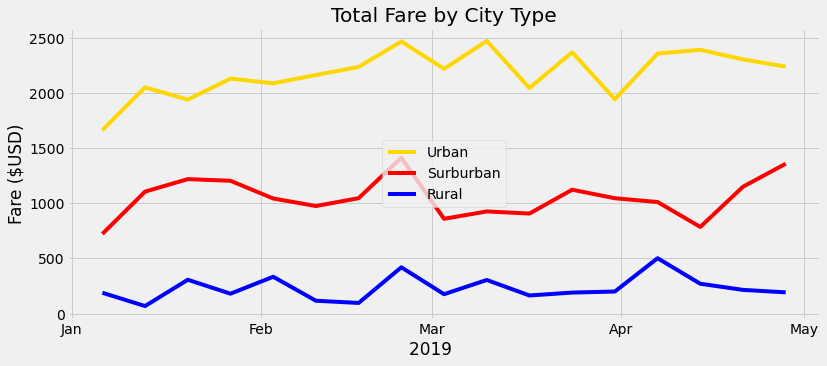

In [44]:
# Using the object-oriented interface method, plot the resample DataFrame


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (12, 5))

#x and y values for plots
x_values = type_date_wind_pivot.index
urban_week_fares = type_date_wind_pivot['Urban']
suburban_week_fares = type_date_wind_pivot['Suburban']
rural_week_fares = type_date_wind_pivot['Rural']


ax.plot(x_values, urban_week_fares, c = 'gold', label = 'Urban')

ax.plot(x_values, suburban_week_fares, c = 'red', label = 'Surburban')

ax.plot(x_values, rural_week_fares, c = 'blue', label = 'Rural')

# Define date format
fmt_month = dates.MonthLocator()
ax.xaxis.set_major_locator(fmt_month)
date_form = dates.DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)

# add title, x and y labels and legend
ax.set_title('Total Fare by City Type')
ax.set_xlabel('2019     ')
ax.set_ylabel('Fare ($USD)')
ax.legend(loc = 'best')

fig.savefig('analysis/PyBer_fare_summary.png')